In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report



In [4]:
iris = load_iris()


X = iris.data[:, :2]
y = iris.target

print("Features shape:", X.shape)
print("Labels shape:", y.shape)


Features shape: (150, 2)
Labels shape: (150,)


In [5]:
print("Features shape:", X.shape)
print("Labels shape:", y.shape)


Features shape: (150, 2)
Labels shape: (150,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Training data:", X_train.shape)
print("Testing data:", X_test.shape)


Training data: (105, 2)
Testing data: (45, 2)


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Feature scaling done")


Feature scaling done


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred))


KNN Accuracy: 0.8222222222222222
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.73      0.62      0.67        13
           2       0.67      0.77      0.71        13

    accuracy                           0.82        45
   macro avg       0.80      0.79      0.79        45
weighted avg       0.82      0.82      0.82        45



In [9]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))


SVM Accuracy: 0.7333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.54      0.54      0.54        13
           2       0.54      0.54      0.54        13

    accuracy                           0.73        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.73      0.73      0.73        45



In [10]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="gini")
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))


Decision Tree Accuracy: 0.6888888888888889
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.46      0.46      0.46        13
           2       0.50      0.54      0.52        13

    accuracy                           0.69        45
   macro avg       0.65      0.65      0.65        45
weighted avg       0.70      0.69      0.69        45



In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(model, title):
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.01),
        np.arange(y_min, y_max, 0.01)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


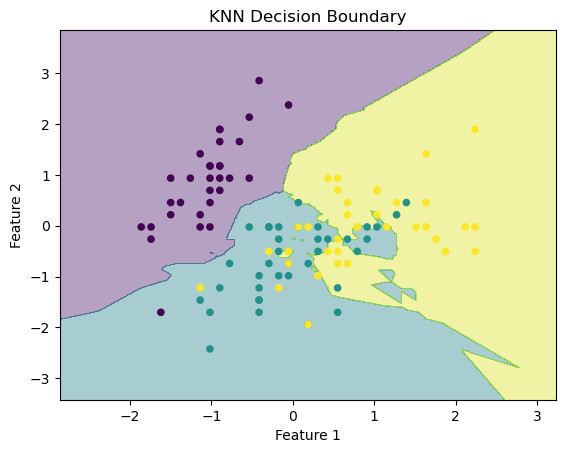

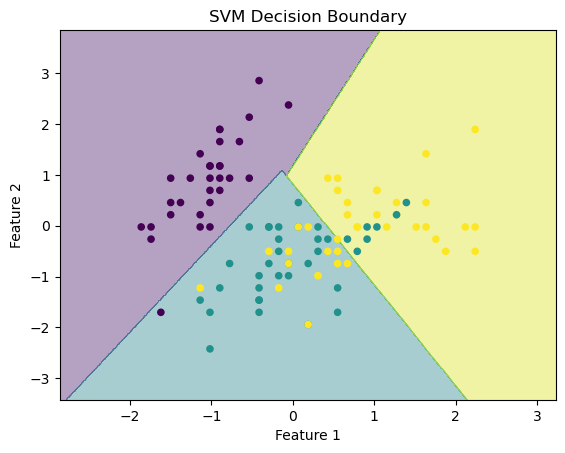

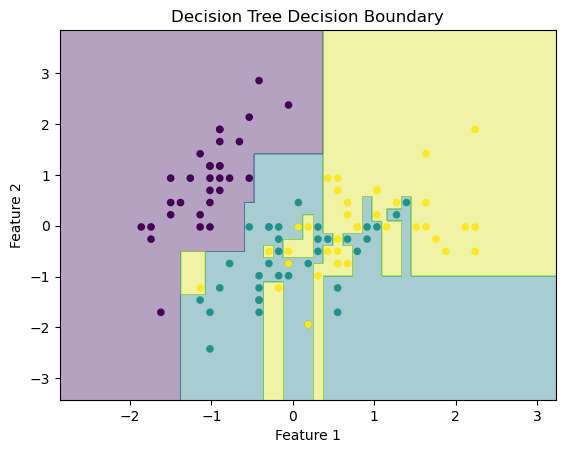

In [12]:
plot_decision_boundary(knn, "KNN Decision Boundary")
plot_decision_boundary(svm, "SVM Decision Boundary")
plot_decision_boundary(dt, "Decision Tree Decision Boundary")
